#### Project Overview

This project focuses on conducting an in-depth analysis of the Forbes 2000 list for the year 2022. The primary objective is to compare the data from 2022 with information from previous years, exploring trends and variations in company rankings and financial performance. The Forbes 2000 list ranks the top 2000 companies globally based on various financial metrics. Through this analysis, we aim to provide insights into the evolving landscape of the world's leading companies.


Hypothesis involved:

 Hypothesis 1: Companies with higher rankings on the Forbes 2000 list tend to have higher revenue, profits, and assets.

Hypothesis 2: Companies that are based in countries with more developed economies tend to have higher rankings on the Forbes 2000 list.

Hypothesis 3: Companies that have been founded for more years tend to have higher rankings on the Forbes 2000 list.

hypothesis 4: Companies in the technology industry have higher profits and accumulated larger assets in short time, compared to companies in other fields.

Hypothesis 5: The increase in profits for oil and gas companies has decreased over time, likely due to growing public conscience against fossil fuels.

Hypothesis 6: The increase in profits of companies is positively correlated with the GDP growth of their respective countries.

Hypothesis 7: The Forbes 2000 list should exhibit a distinct and significant increase in the representation and ranking of technology companies, stemming from technological advancements and innovations, particularly from the year 2010 onwards.



## Data Sources : 

1. Fortune 2000 list for the year 2022 : https://www.kaggle.com/datasets/rakkesharv/forbes-2000-global-companies/data?select=Forbes_2000_top_company_CLNQ11.csv
2. Fortune 2000 list for the years (2008-2021) :  https://data.world/aroissues/forbes-global-2000-2008-2019
3. GDP by country : https://www.kaggle.com/code/alejopaullier/gdp-by-country-1999-2022/input?select=GDP+by+Country+1999-2022.csv

# Importing necessary libraries

In [1]:
import pandas as pd

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import numpy as np

from scipy.stats import pearsonr

from chord import Chord

import re

import time
import glob

# loading the dataset

In [2]:
# Contains List of Fortune 2000 companies for the year 2022 
data = pd.read_csv("data/Forbes Global 2000 - 2022.csv")

# Contains the GDP of countries
gdp = pd.read_csv("data/GDP by Country 1999-2022.csv")

In [3]:
# Inspecting the dataset
data.head()

,2022 Ranking,Organization Name,Industry,Country,Year Founded,CEO,Revenue (Billions),Profits (Billions),Assets (Billions),Market Value (Billions),Total Employees
0,1,Berkshire Hathaway,Diversified Financials,United States,1939,Warren Edward Buffett,276.09,89.80,958.78,741.48,372000.0
1,2,ICBC,Banking,China,1984,Shu Gu,208.13,54.03,5518.51,214.42,449296
2,3,Saudi Arabian Oil Company (Saudi Aramco),Oil & Gas Operations,Saudi Arabia,1933,Amin bin Hasan Al-Nasser,400.38,105.36,576.04,2292.08,68493.0
3,4,JPMorgan Chase,Diversified Financials,United States,2000,Jamie Dimon,124.54,42.12,3954.69,374.45,271025.0
4,5,China Construction Bank,Banking,China,2014,Wang Zuji,202.07,46.89,4746.95,181.32,352621


In [4]:
gdp.head()

,Country,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,"Afghanistan, Rep. of.",0,0,0,4.084,4.585,5.971,7.309,8.399,9.892,...,21.555,24.304,0,0,0,0,0,0,0,0
1,Albania,3.444,3.695,4.096,4.456,5.6,7.452,8.376,9.133,10.163,...,14.91,16.053,11.591,12.204,13.214,14.341,15.553,16.996,16.77,18.012
2,Algeria,48.845,54.749,55.181,57.053,68.013,85.016,102.38,114.322,116.158,...,190.432,203.449,175.077,181.71,192.256,202.179,210.906,219.16,163.812,168.195
3,Angola,6.153,9.135,8.936,11.386,13.956,19.8,30.632,43.759,55.37,...,136.415,151.089,102.011,98.815,105.369,112.533,119.403,127.15,70.339,74.953
4,Antigua and Barbuda,0.652,0.678,0.71,0.718,0.754,0.818,0.875,0.962,1.026,...,1.404,1.494,1.285,1.328,1.386,1.458,1.536,1.617,1.405,1.534


# Cleaning and organizing Data

In [5]:
## Total number of employees sometimes has variable have "[" at the end

data["Total Employees"] = data["Total Employees"].apply(lambda x : re.sub(r"\]", "", x))

#### Combining the datasets of different years from 2008 to 2022 into a single dataset, by adhering to the tidy data principles

In [6]:
## printing all the files present
for name in glob.glob('data/*'): 
    print(name)

data\Forbes Global 2000 - 2008.csv
data\Forbes Global 2000 - 2009.csv
data\Forbes Global 2000 - 2010.csv
data\Forbes Global 2000 - 2011.csv
data\Forbes Global 2000 - 2012.csv
data\Forbes Global 2000 - 2013.csv
data\Forbes Global 2000 - 2014.csv
data\Forbes Global 2000 - 2015.csv
data\Forbes Global 2000 - 2016.csv
data\Forbes Global 2000 - 2017.csv
data\Forbes Global 2000 - 2018.csv
data\Forbes Global 2000 - 2019.csv
data\Forbes Global 2000 - 2020.csv
data\Forbes Global 2000 - 2021.csv
data\Forbes Global 2000 - 2022.csv
data\GDP by Country 1999-2022.csv


In [7]:
# Inspecting the forbes 2008 dataset
df_2008 = pd.read_csv("data\Forbes Global 2000 - 2008.csv", index_col = 0)
df_2008.dtypes

Rank_nr           int64
Company          object
Industry         object
Country          object
Sales           float64
Profits         float64
Assets          float64
Market_Value    float64
dtype: object

#### To distinguish this dataset from others, let's include a column named 'Year'

In [8]:
data["Year"] = 2022

In [9]:
data.dtypes

2022 Ranking                 int64
Organization Name           object
Industry                    object
Country                     object
Year Founded                 int64
CEO                         object
Revenue (Billions)         float64
Profits (Billions)         float64
Assets (Billions)          float64
Market Value (Billions)    float64
Total Employees             object
Year                         int64
dtype: object

We can observe that columns at in the datasets from 2008-2021 have fewer columns and column names are different, lets rename columns consistently and merege the csv files, and also the Units used are different.

#### lets arrange the names of the columns for consistency

In [10]:
data.rename(columns={'2022 Ranking':'Rank_nr','Organization Name': 'Company', 'Revenue (Billions)': 'Sales', 'Profits (Billions)':'Profits', 'Assets (Billions)' : 'Assets', 'Market Value (Billions)':'Market_Value'}, inplace=True)
data.head()

,Rank_nr,Company,Industry,Country,Year Founded,CEO,Sales,Profits,Assets,Market_Value,Total Employees,Year
0,1,Berkshire Hathaway,Diversified Financials,United States,1939,Warren Edward Buffett,276.09,89.80,958.78,741.48,372000.0,2022
1,2,ICBC,Banking,China,1984,Shu Gu,208.13,54.03,5518.51,214.42,449296,2022
2,3,Saudi Arabian Oil Company (Saudi Aramco),Oil & Gas Operations,Saudi Arabia,1933,Amin bin Hasan Al-Nasser,400.38,105.36,576.04,2292.08,68493.0,2022
3,4,JPMorgan Chase,Diversified Financials,United States,2000,Jamie Dimon,124.54,42.12,3954.69,374.45,271025.0,2022
4,5,China Construction Bank,Banking,China,2014,Wang Zuji,202.07,46.89,4746.95,181.32,352621,2022


In [11]:
# This function retrieves the year from file name.
def get_year_of_file(filename):

    # Define the regular expression
    pattern = re.compile(r"(\d{4})\.csv$")
    
    # Use search to find the match in the filename
    match = pattern.search(filename)
    
    # Check if a match is found
    if match:
        # Extract the year from the matched group
        return match.group(1)
        
    else:
        print("No year found in the filename.")


In [12]:

# This function combines the datasets
def combine_datasets(data_2022):
    
    # Added a column named 'Year,' which, along with the ranking, can serve as the primary key for the dataset.
    data = pd.DataFrame()

    # Iterating through all the files
    for filename in glob.glob("data\*"):

        # Loading the dataset
        df = pd.read_csv(filename, index_col = 0)
        
        try:
            # Retrieving the year name from the function and broadcasting it across all columns.
            df["Year"] = int(get_year_of_file(filename))
        except TypeError as e:
            print("get_year_of_file method is not returning year, instead returning None")
            
        if int(get_year_of_file(filename)) != 2022:
            
            df["Rank_nr"] = df["Rank_nr"].map(lambda x : int(x))
            
            # converting the sales in millions of dollars to Billions
            df["Sales"] = df["Sales"].map(lambda x : x/1000)
            df["Profits"] = df["Profits"].map(lambda x : x/1000)
            df["Assets"] = df["Assets"].map(lambda x : x/1000)
            df["Market_Value"] = df["Market_Value"].map(lambda x : x/1000)
            
            if not data.empty: 
                data = pd.merge(data, df, on=["Rank_nr", "Company", 'Industry', 'Country', 'Sales', 'Profits', 'Assets', 'Market_Value', 'Year'], how='outer')
            else:
                data = df
            
    # Merging the 2022 dataset with data from 2008 to 2021
    data = pd.merge(data, data_2022, on=["Rank_nr", "Company", 'Industry', 'Country', 'Sales', 'Profits', 'Assets', 'Market_Value', 'Year'], how='outer')
        
    return data

In [13]:
# calling the merge dataset function
data = combine_datasets(data)
data

,Rank_nr,Company,Industry,Country,Sales,Profits,Assets,Market_Value,Year,Year Founded,CEO,Total Employees
0,1,HSBC Holdings,Banking,United Kingdom,146.50,19.13,2348.98,180.81,2008,NaN,NaN,NaN
1,2,General Electric,Conglomerates,United States,172.74,22.21,795.34,330.93,2008,NaN,NaN,NaN
2,3,Bank of America,Banking,United States,119.19,14.98,1715.75,176.53,2008,NaN,NaN,NaN
3,4,JPMorgan Chase,Banking,United States,116.35,15.37,1562.15,136.88,2008,NaN,NaN,NaN
4,5,ExxonMobil,Oil & Gas Operations,United States,358.60,40.61,242.08,465.51,2008,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
29987,1995,Aperam,Materials,Luxembourg,6.03,1.14,6.72,3.16,2022,2010.0,Timoteo di Maulo,0
29988,1995,Shenzhen Feima International Supply Chain,Business Services & Supplies,China,0.04,1.41,0.17,1.14,2022,1998.0,Shan Min Huang,306.0
29989,1997,NMDC,Materials,India,3.52,1.41,5.72,6.40,2022,1958.0,Sumit Deb,16944.0
29990,1997,Sichuan Changhong Electric,Consumer Durables,China,15.72,0.05,12.10,1.96,2022,1988.0,Wei Li,51841.0


In [14]:
data.sample(10)

,Rank_nr,Company,Industry,Country,Sales,Profits,Assets,Market_Value,Year,Year Founded,CEO,Total Employees
2256,257,Costco Wholesale,Retailing,United States,72.950,1.2000,21.000,18.340,2009,NaN,NaN,NaN
15471,1478,GEA Group,Conglomerates,Germany,5.990,0.4509,7.057,9.545,2015,NaN,NaN,NaN
6159,160,Hutchison Whampoa,Conglomerates,Hong Kong-China,26.930,1.8272,87.276,49.896,2011,NaN,NaN,NaN
3183,1184,Bank of Baroda,Banking,India,3.560,0.3900,45.720,1.570,2009,NaN,NaN,NaN
27574,1582,First Quantum Minerals,Materials,Canada,5.211,-0.1858,24.236,15.736,2021,NaN,NaN,NaN
24146,154,China Evergrande Group,Construction,China,69.432,2.5364,316.778,23.506,2020,NaN,NaN,NaN
21650,1658,Suzuken,Drugs & Biotechnology,Japan,19.164,0.1698,11.074,4.242,2018,NaN,NaN,NaN
25086,1094,TUI,Business Services & Supplies,Germany,21.608,0.5055,20.128,2.351,2020,NaN,NaN,NaN
7581,1583,Shenzhen Overseas,"Hotels, Restaurants & Leisure",China,2.200,0.4491,7.366,6.901,2011,NaN,NaN,NaN
21434,1442,Alleghany,Insurance,United States,6.527,0.1125,25.097,8.957,2018,NaN,NaN,NaN


We are now done with the tidying of the dataset.

In [15]:
data.describe()

,Rank_nr,Sales,Profits,Assets,Market_Value,Year,Year Founded
count,29992.000000,29976.000000,29979.000000,29976.000000,29984.000000,29992.000000,1999.000000
mean,1000.349427,18.567988,1.369242,83.480961,23.749394,2015.000033,1863.992496
std,577.302911,32.926837,3.777668,271.576589,58.911175,4.320814,421.815723
min,1.000000,-22.730000,-99.290000,0.001000,0.000000,2008.000000,0.000000
25%,500.000000,3.950000,0.296400,9.701000,5.182750,2011.000000,1919.000000
50%,1000.500000,8.878500,0.612000,21.141000,10.660500,2015.000000,1971.000000
75%,1500.000000,18.343750,1.358750,50.960500,22.762250,2019.000000,1996.000000
max,2000.000000,572.750000,105.360000,5518.510000,2640.320000,2022.000000,2022.000000


The Average profit's for the companies in the list are staggering 2.5 billion dollars.

In [16]:
data.describe(include = "object")

,Company,Industry,Country,CEO,Total Employees
count,29992,29992,29992,1999,1999
unique,4700,36,90,1963,1746
top,HSBC Holdings,Banking,United States,No Data,0
freq,15,4591,8462,23,66


There are 29 industries that make up the forbes 2000 list.

In [17]:
data.nunique()

Rank_nr             2000
Company             4700
Industry              36
Country               90
Sales              17720
Profits            15049
Assets             22518
Market_Value       18925
Year                  15
Year Founded         214
CEO                 1963
Total Employees     1746
dtype: int64

In [18]:
data.isna().sum()

Rank_nr                0
Company                0
Industry               0
Country                0
Sales                 16
Profits               13
Assets                16
Market_Value           8
Year                   0
Year Founded       27993
CEO                27993
Total Employees    27993
dtype: int64

In [19]:
data.sample(10)

,Rank_nr,Company,Industry,Country,Sales,Profits,Assets,Market_Value,Year,Year Founded,CEO,Total Employees
3719,1720,Fletcher Building,Construction,New Zealand,5.400,0.3600,4.700,1.330,2009,NaN,NaN,NaN
29118,1126,Polyus,Materials,Russia,4.960,2.2600,7.930,23.380,2022,2006.0,Alexey Vostokov,18000
18347,354,CSX,Transportation,United States,11.069,1.7140,36.036,43.784,2017,NaN,NaN,NaN
29275,1283,Wuxi Apptec,Drugs & Biotechnology,China,3.550,0.7900,8.650,49.710,2022,2000.0,"Edward Hu, Ge Li",34912.0
20291,299,CaixaBank,Banking,Spain,11.657,2.3197,472.790,30.709,2018,NaN,NaN,NaN
24268,276,Dominion Energy,Utilities,United States,16.426,1.3580,103.823,64.635,2020,NaN,NaN,NaN
3661,1662,Higo Bank,Banking,Japan,0.760,0.0700,35.760,1.350,2009,NaN,NaN,NaN
15194,1200,Cincinnati Financial,Insurance,United States,4.950,0.5250,19.152,8.863,2015,NaN,NaN,NaN
14341,347,Nokia,Technology Hardware & Equipment,Finland,16.888,4.1664,25.487,28.590,2015,NaN,NaN,NaN
4345,346,Criteria Caixa,Diversified Financials,Spain,6.530,1.8400,70.370,15.280,2010,NaN,NaN,NaN


#### Checking if the data was duplicated 

In [20]:
data.duplicated().sum()

0

In [21]:
data.dtypes

Rank_nr              int64
Company             object
Industry            object
Country             object
Sales              float64
Profits            float64
Assets             float64
Market_Value       float64
Year                 int64
Year Founded       float64
CEO                 object
Total Employees     object
dtype: object

In [22]:
# Function to convert object datatype to float
def convert_to_float(a):
    return float(a)

In [23]:
# Converting the "Total Employees" column of object type to Float
data["Total Employees"] = data["Total Employees"].apply(convert_to_float)
data["Total Employees"].dtypes

dtype('float64')

Note : We are excluding 2011 from our analysis in this project, because 2011 GDP is not available in our data

In [24]:
# Identify the columns for the years 2008 to 2022
years_columns = ['2008', '2009', '2010', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']

# Remove commas from all columns in years_columns and convert to numeric
gdp[years_columns] = gdp[years_columns].apply(lambda x: pd.to_numeric(x.str.replace(',', ''), errors='coerce'), axis=0)

### lets create a DataFrame, which consists profits and gdp

In [25]:
profits_per_year = data.groupby(["Year","Country"])["Profits", ].sum().reset_index()

profits_per_year = profits_per_year[profits_per_year["Year"] > 2011]

profits_per_year = profits_per_year.sort_values(["Year", "Profits"], ascending=[True, False]).reset_index()

gdp_by_country = []
for index, row in profits_per_year.iterrows():
    try :
        gdp_by_country.append(gdp[gdp["Country"] == row["Country"]][str(row["Year"])].values[0])
    except IndexError as IE:
        gdp_by_country.append(np.nan)

profits_per_year["gdp"] = gdp_by_country

# removing countries whose GDP value is not present
profits_per_year = profits_per_year.dropna().reset_index()

In [26]:
# Dropping useless columns
profits_per_year.drop(["level_0", "index"], axis =1 )

,Year,Country,Profits,gdp
0,2012,United States,860.9595,16008.510
1,2012,China,224.7145,6524.230
2,2012,United Kingdom,168.3355,2611.270
3,2012,Japan,143.4820,5410.700
4,2012,France,98.8540,2907.440
...,...,...,...,...
616,2022,Bahrain,0.5700,41.057
617,2022,Czech Republic,0.4500,302.061
618,2022,Uruguay,0.0800,63.741
619,2022,Argentina,0.0000,483.765


# EDA 

### Which country boasts the highest representation of companies in the Fortune Global 2000 list for the year 2022?

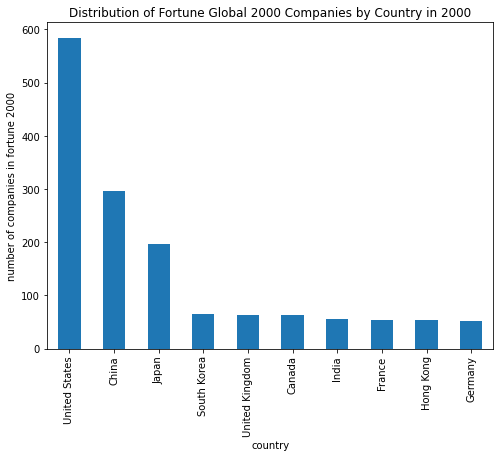

In [27]:
frequencies_by_country = data["Country"][data["Year"] == 2022].value_counts().head(10)

plt.figure(figsize=(8,6))
frequencies_by_country.plot(kind = "bar")
plt.xlabel("country")
plt.ylabel("number of companies in fortune 2000")
plt.title("Distribution of Fortune Global 2000 Companies by Country in 2000")
plt.show()

# extension : display line chart to GDP of the country as a comparison

Over half of the Fortune Global 2000 companies are headquartered in three countries: the United States, China, and Japan.

### Distribution of Fortune 2000 companies over the years


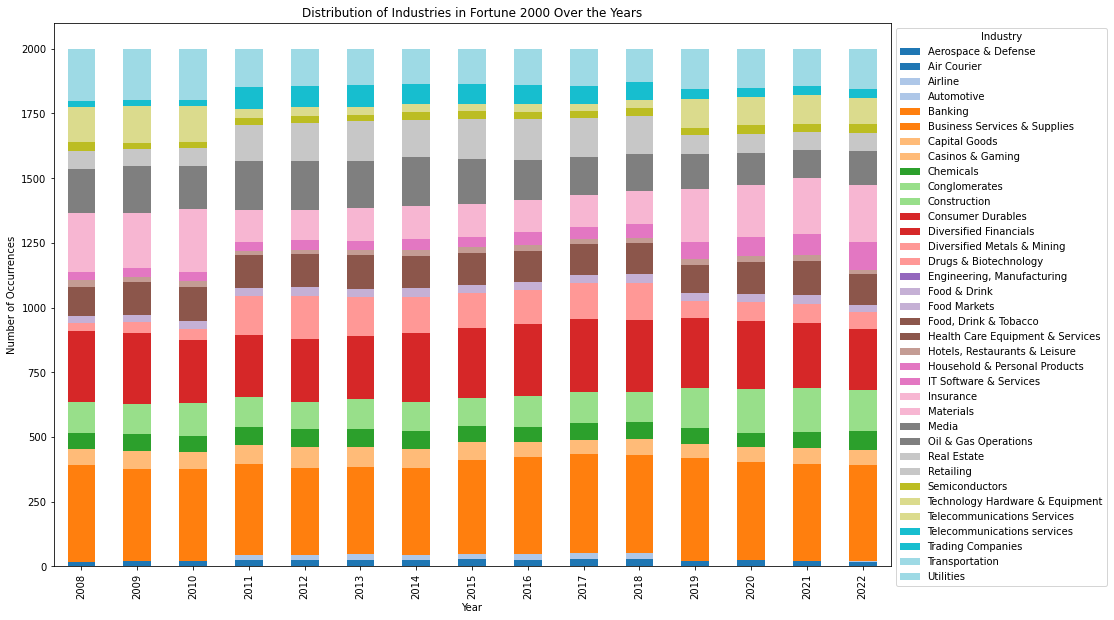

In [28]:
# Group by "Year" and "Industry" and count occurrences
industry_counts_by_year = data.groupby(['Year', 'Industry']).size().unstack().fillna(0)

# Plot the stacked bar chart
# Use a different colormap for better color differentiation
industry_counts_by_year.plot(kind='bar', stacked=True, figsize=(15, 10), colormap='tab20')
plt.title("Distribution of Industries in Fortune 2000 Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Occurrences")
plt.legend(title="Industry", bbox_to_anchor=(1, 1), loc='upper left')
plt.show()


- It seems like there is some fluctuation in the composition of Fortune 2000 companies, with certain industries entering and leaving the list over the years. This could be due to various factors such as changes in market dynamics, economic conditions, or industry-specific challenges. It's interesting to observe how certain industries make periodic appearances in the list.
-  The combination of Industries over the years, fairly remains the same.

### Ranking of Software IT and services over the Years

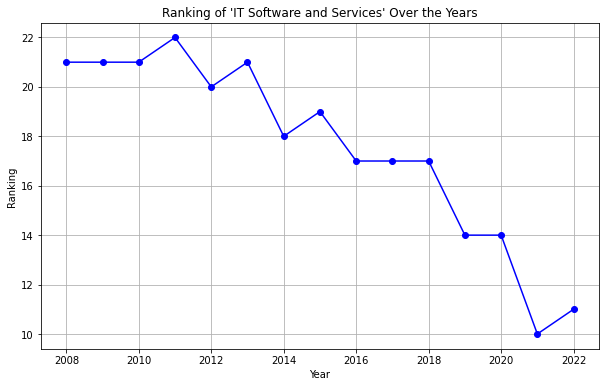

In [29]:

# Group by "Year" and "Industry" and count occurrences
industry_counts_by_year = data.groupby(['Year', 'Industry']).size().unstack().fillna(0)

# Get the total count of each industry across all years
industry_total_counts = industry_counts_by_year.sum()

# Create a dictionary to store rankings for each year
it_software_rankings = {}

# Loop through each year
for year in industry_counts_by_year.index:
    # Get the count of each industry for the current year
    industry_counts = industry_counts_by_year.loc[year]
    
    # Sort industries by count in descending order
    sorted_industries = industry_counts.sort_values(ascending=False)
    
    # Check the ranking of 'IT Software and Services' for the current year
    it_software_ranking = sorted_industries.index.get_loc('IT Software & Services') + 1  # Adding 1 to make it 1-indexed
    
    # Store the ranking in the dictionary
    it_software_rankings[year] = it_software_ranking

# Convert the dictionary to a DataFrame
ranking_df = pd.DataFrame(list(it_software_rankings.items()), columns=['Year', 'Ranking'])

# Sort the DataFrame by year
ranking_df = ranking_df.sort_values(by='Year')

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(ranking_df['Year'], ranking_df['Ranking'], marker='o', linestyle='-', color='b')
plt.title("Ranking of 'IT Software and Services' Over the Years")
plt.xlabel("Year")
plt.ylabel("Ranking")
plt.grid(True)
plt.show()


Over the years, the number of IT software and services companies increased in the forbes list 

### Lets see the same composition in the first 200 companies in the year 2022

Text(0, 0.5, 'number of industries in fortune 200')

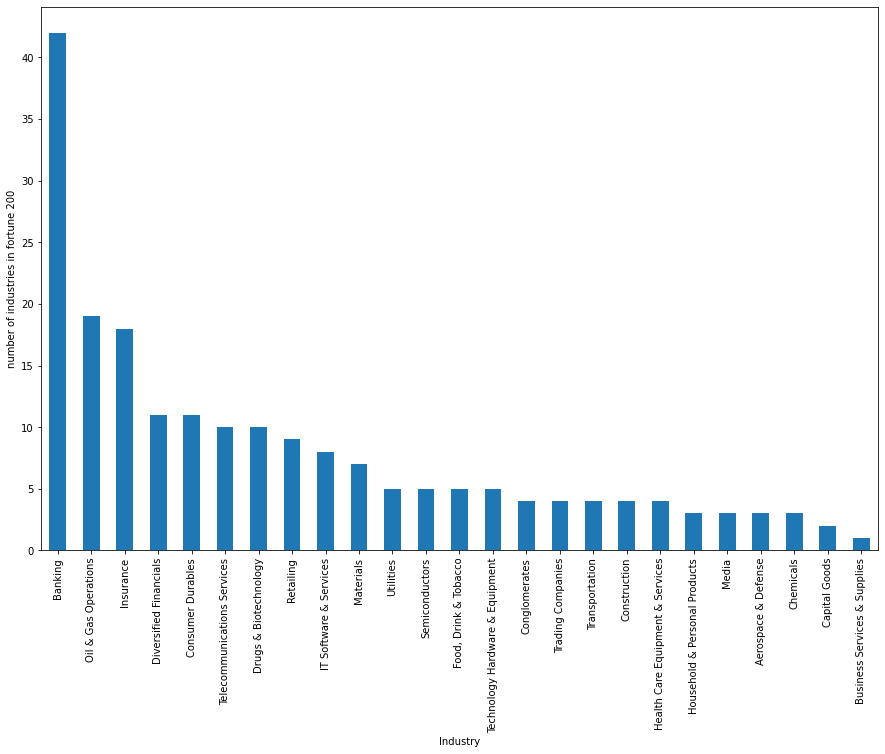

In [30]:
frequencies_by_industry = data["Industry"][data["Year"] == 2022].iloc[:200].value_counts()

plt.figure(figsize=(15,10))
frequencies_by_industry.plot(kind = "bar")
plt.xlabel("Industry")
plt.ylabel("number of industries in fortune 200")

## Lets see the composition of fortune 2000 companies over years

The composition of countries was fairly similar, but the involvment of chinese countries drastically increased from 70 to about 300 in 2022, similarly the companies fortune companies decreased from 260 in 2008 to 200 in 2022

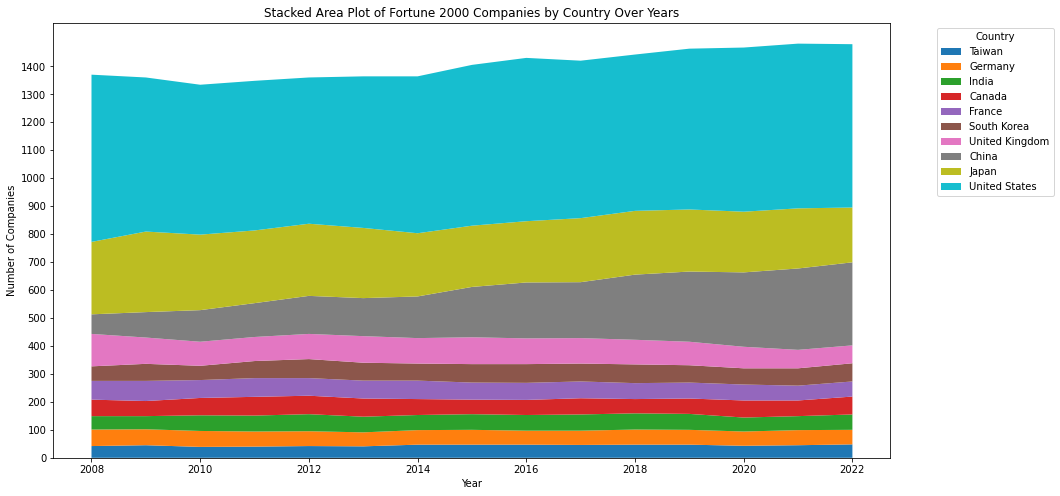

In [31]:

# Group by year and country to get the counts
composition_data = data.groupby(['Year', 'Country']).size().reset_index(name='Count')

# Filter for the top 10 countries
top_countries = composition_data.groupby('Country')['Count'].sum().nlargest(10).index
filtered_data = composition_data[composition_data['Country'].isin(top_countries)]

# Pivot the table for the stacked area plot
pivot_data = filtered_data.pivot_table(index='Year', columns='Country', values='Count', fill_value=0)

# Reverse the order of columns (countries)
pivot_data = pivot_data[top_countries[::-1]]

# Set up the stacked area plot
plt.figure(figsize=(15, 8))
plt.stackplot(pivot_data.index, pivot_data.values.T, labels=top_countries[::-1], cmap='viridis')

plt.yticks(range(0,1500,100))
# Customize the plot
plt.title('Stacked Area Plot of Fortune 2000 Companies by Country Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Companies')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

Banking and Oil Gas Operations are the dominating industries.

## Hypothesis 1 : Companies with higher rankings on the Forbes 2000 list tend to have higher revenue, profits, and assets.

## Line Graph: Sales, Profits, and Assets of the Top 200 Companies in 2022

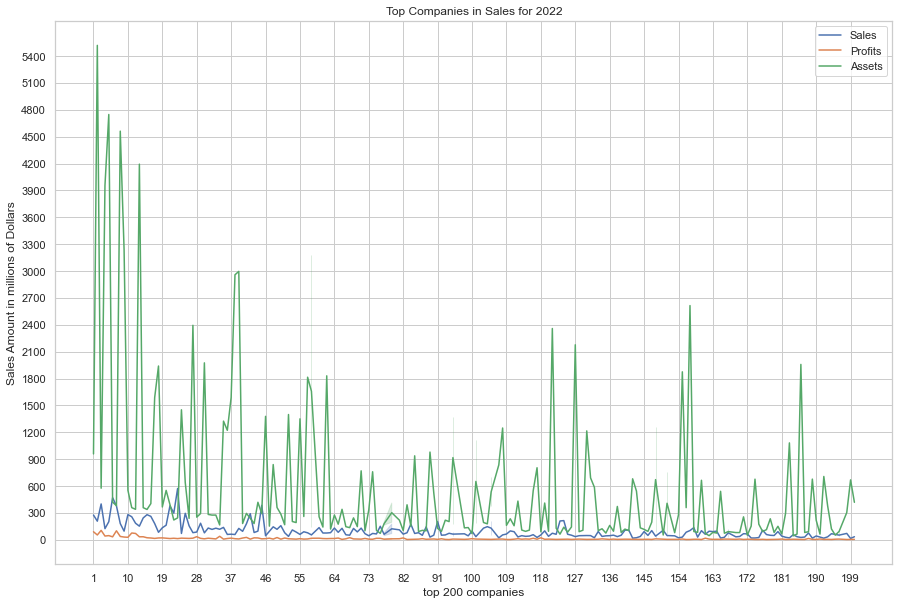

In [32]:

# Filter data for the year 2022
data_2022 = data[data["Year"] == 2022]

# Select the top N companies based on sales
top_companies = data_2022.iloc[:200]

# Set the style for the plot
sns.set(style="whitegrid")

# Create a figure and axis
plt.figure(figsize=(15, 10))

sns.lineplot(y = top_companies["Sales"],x = top_companies["Rank_nr"], label = "Sales")
sns.lineplot(y = top_companies["Profits"],x = top_companies["Rank_nr"], label = "Profits")
sns.lineplot(y = top_companies["Assets"],x = top_companies["Rank_nr"], label = "Assets")

plt.yticks(range(0, int(data_2022["Assets"].max())+1, 300))
plt.xticks(range(1,201, 9))

# Customize the plot
plt.title("Top Companies in Sales for 2022")
plt.xlabel("top 200 companies")
plt.ylabel("Sales Amount in millions of Dollars")
plt.legend()
plt.grid(True)
plt.show()

- The rankings of companies in the list do not seem to be solely determined by the combination of sales, profits, and assets. For instance, the top-ranked company has relatively fewer assets compared to companies lower in the ranking. Additionally, the 19th-ranked company holds a relatively high position despite having lower sales, profits, and assets compared to its neighboring companies.

- Upon closer inspection, companies in the rankings from about 73 to 82 exhibit a similar trend—they possess lower sales, profits, and assets compared to their neighbors on the right, yet they maintain relatively high ranks. This suggests that Forbes' ranking methodology may incorporate factors beyond financial metrics, such as public sentiment, market growth, or other qualitative considerations. The intricate interplay of these various factors contributes to the final rankings observed in the Forbes list.

## Heatmap: Correlation Matrix for Fortune Global 2000 Companies in 2022


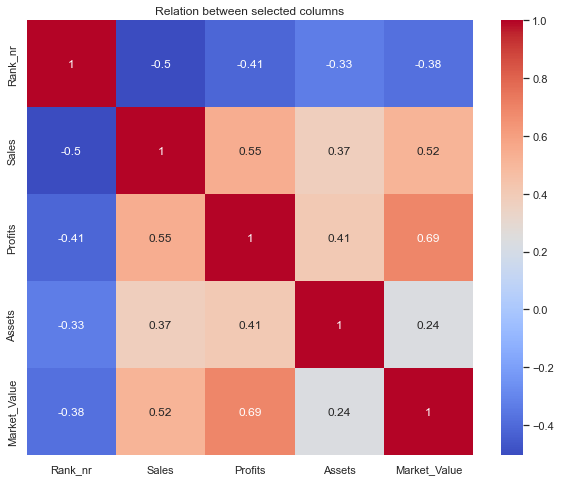

In [33]:
selected_columns = ['Rank_nr','Sales', 'Profits', 'Assets', 'Market_Value']
subset_data = data[selected_columns]

# Calculate the correlation matrix for the selected columns
corr_subset = subset_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_subset, cmap="coolwarm", annot=True)
plt.title("Relation between selected columns")

# Show the plot
plt.show()

The negative correlations between Forbes 2000 rank and financial metrics (sales, profits, assets, market value) suggest an inverse relationship. The strength of the correlations can be interpreted as follows:

- Rank vs Sales: The correlation coefficient of -0.5 indicates a moderate negative relationship. As the Forbes 2000 rank improves (decreases), there is a moderate tendency for companies to have higher sales.

- Rank vs Profits: The correlation coefficient of -0.41 suggests a moderate negative relationship. Companies with better Forbes 2000 ranks tend to have moderately higher profits.

- Rank vs Assets: The correlation coefficient of -0.33 signifies a relatively weak negative relationship. While there is a negative association, it is not as strong as in the case of sales and profits.

- Rank vs Market Value: The correlation coefficient of -0.38 points to a moderate negative relationship. Companies with lower Forbes 2000 ranks tend to have moderately higher market values.

In summary, these correlations indicate that, on average, companies with better Forbes 2000 ranks tend to exhibit higher financial metrics, and the strength of this relationship varies from moderate to weak depending on the specific metric.

## Hypothesis 2: Companies that are based in countries with more developed economies tend to have higher rankings on the Forbes 2000 list.

In [34]:
gdp_2022 = gdp.loc[:,["Country", "2022"]]
gdp_2022 = gdp_2022.rename(columns={'2022': 'GDP'})
gdp_2022 = gdp_2022.sort_values(by = ["GDP", "Country"], ascending = [False, True])

## Heatmap: Correlation between GDP and Ranking for Fortune Global 2000 Companies in 2022

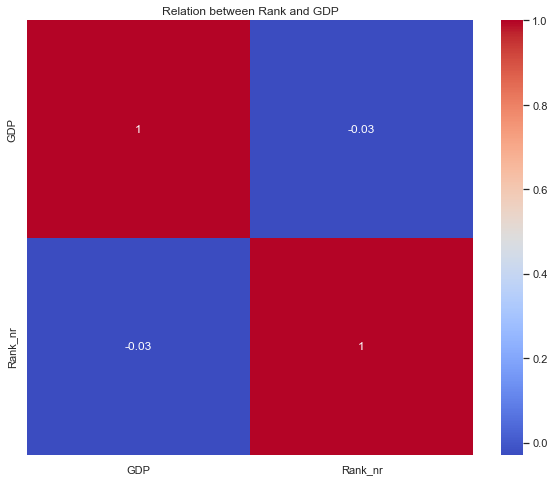

In [35]:
merged_data = pd.merge(data[data["Year"] == 2022], gdp_2022, on = "Country") 
subset = ["GDP", "Rank_nr"]
subset = merged_data[subset]

# Calculate the correlation matrix for the selected columns
corr_subset = subset.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_subset, cmap="coolwarm", annot=True)
plt.title("Relation between Rank and GDP")

# Show the plot
plt.show()
          


- A correlation coefficient of -0.03 indicates a very weak negative correlation between the 'Rank_nr' and 'GDP' for the year 2022. The negative sign indicates that as one variable increases, the other tends to decrease, but the strength of this relationship is very low. The magnitude of -0.03 suggests that the correlation is close to zero, implying that there is little to no linear relationship between the Forbes 2000 rank and the GDP for the year 2022 in your dataset.

- In practical terms, the weak correlation suggests that the rank of companies on the Forbes 2000 list is not strongly influenced by the GDP of the countries they are based in for the year 2022. Other factors or criteria are likely more influential in determining the rankings.

## Hypothesis 3: Companies that have been founded for more years tend to have higher rankings on the Forbes 2000 list.

## Regression Plot: Analysis of the Relationship between Founded Date and Rank for Fortune Global 2000 Companies in 2022

Examining the potential correlation between the founded date and the rank of Fortune Global 2000 companies in the year 2022 using a regression plot.


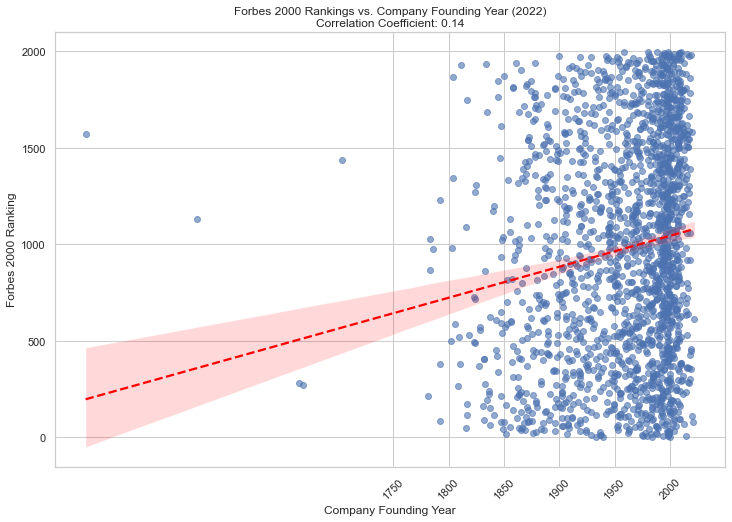

Correlation Coefficient: 0.14


In [36]:
# Filter data for the year 2022 and exclude companies with founding year 0
data_2022 = data[(data['Year'] == 2022) & (data['Year Founded'] > 0)]

# Set up a regplot
plt.figure(figsize=(12, 8))
sns.regplot(x='Year Founded', y='Rank_nr', data=data_2022, scatter_kws={'alpha':0.6}, line_kws={'color':'red', 'linestyle':'--'})

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(data_2022['Year Founded'], data_2022['Rank_nr'])

# Customize the plot
plt.title(f'Forbes 2000 Rankings vs. Company Founding Year (2022)\nCorrelation Coefficient: {correlation_coefficient:.2f}')
plt.xlabel('Company Founding Year')
plt.ylabel('Forbes 2000 Ranking')
plt.xticks(range(1750, 2023, 50), rotation=45)  # Set x-axis ticks from 1750 to 2022 with a gap of 50
plt.grid(True)
plt.show()

# Display the correlation coefficient
print(f'Correlation Coefficient: {correlation_coefficient:.2f}')

- The correlation coefficient between the rank and founded date of Fortune Global 2000 companies in 2022 is 0.14. This suggests a weak positive correlation, indicating a slight tendency for companies with older founding dates to have higher ranks, but the relationship is not strong.






## Hypothesis 4.1: Companies in the technology industry have higher profits  in short time, compared to companies in other fields.
## Hypothesis 4.2:  Companies in the technology industry have larger accumulated assets in short time, compared to companies in other fields.
&&
## Hypothesis 5: The increase in profits for oil and gas companies has decreased over time, likely due to growing public conscience against fossil fuels.

## Profits Analysis: Top 10 Industries Over 10 Years

Visualizing the profits of the top 10 industries over the span of 10 years provides insights into the trends and performances of these sectors. The graph illustrates the fluctuations and relative standings of the industries in terms of profits from [start year] to [end year].






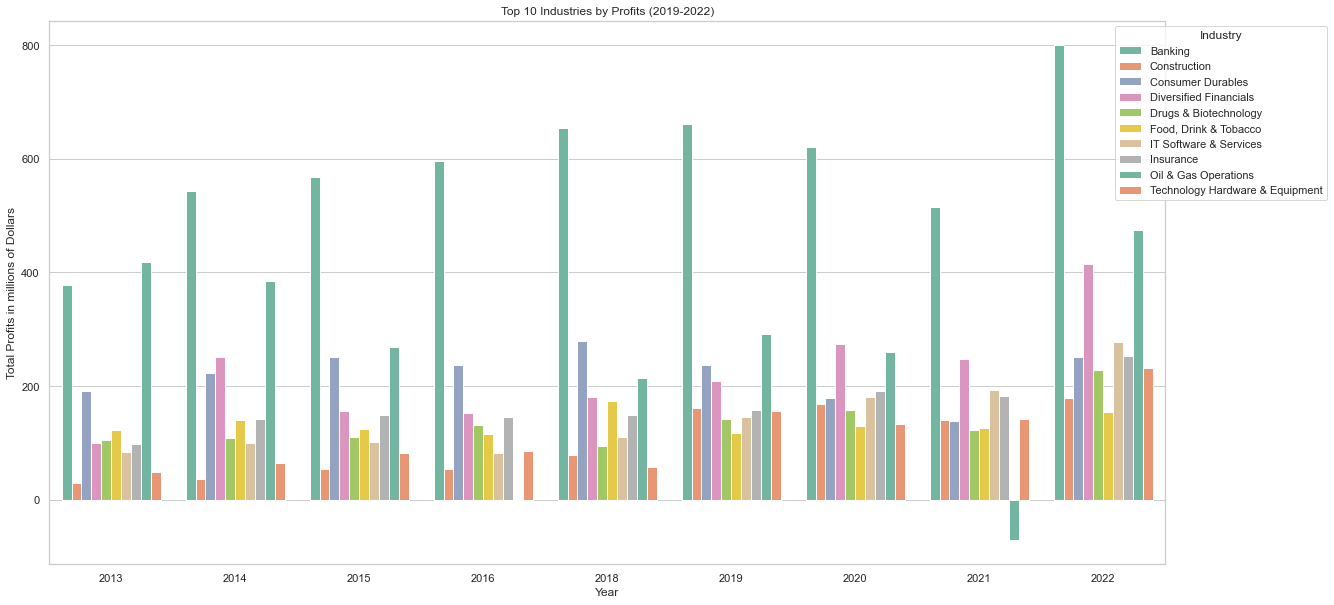

In [37]:

# Filter data for the relevant years
relevant_years = [2013, 2014, 2015, 2016, 1017, 2018, 2019, 2020, 2021, 2022]
data_relevant_years = data[data['Year'].isin(relevant_years)]

# Group by 'Industry' and sum the profits for each industry
industry_profits = data_relevant_years.groupby(['Industry', 'Year'])['Profits'].sum().reset_index()

# Get the top 10 industries based on total profits across all years
top_10_industries = industry_profits.groupby('Industry')['Profits'].sum().nlargest(10).index

# Filter the data for the top 10 industries
top_10_data = industry_profits[industry_profits['Industry'].isin(top_10_industries)]

# Set up a bar plot with a custom color palette
plt.figure(figsize=(20, 10))
sns.barplot(x='Year', y='Profits', hue='Industry', data=top_10_data, palette='Set2')  # Change 'Set2' to any other Seaborn palette

# Customize the plot
plt.title('Top 10 Industries by Profits (2019-2022)')
plt.xlabel('Year')
plt.ylabel('Total Profits in millions of Dollars')
plt.legend(title='Industry', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()

- Hypothesis 4.1 : The software industry does not emerge as a dominant sector; however, the banking sector exhibits prominence. Notably, the profits within the IT software and services sector demonstrate a consistent upward trend over the years.

- Hypothesis 5: The profits in the oil and gas industry exhibit inconsistency over the years, displaying no discernible positive or negative trend. Notably, the industry experienced negative profits in 2016 and 2021. Interestingly, the profits for the oil and gas sector among Fortune companies reached their highest point in 2022, with the second-highest observed in 2014. The exact reasons for these fluctuations cannot be definitively attributed based solely on the available data. Further analysis or external factors might be needed to understand the specific circumstances contributing to these variations in the oil and gas industry's financial performance.

## Accumulated Assets Analysis: Top 5 Industries (2013-2022)

Examining the accumulated assets of the top 5 industries over the period from 2013 to 2022 sheds light on the growth and trends within these sectors. The analysis aims to highlight any significant increases or patterns in the accumulation of assets, providing valuable insights into the financial landscape of these industries during the specified time frame.


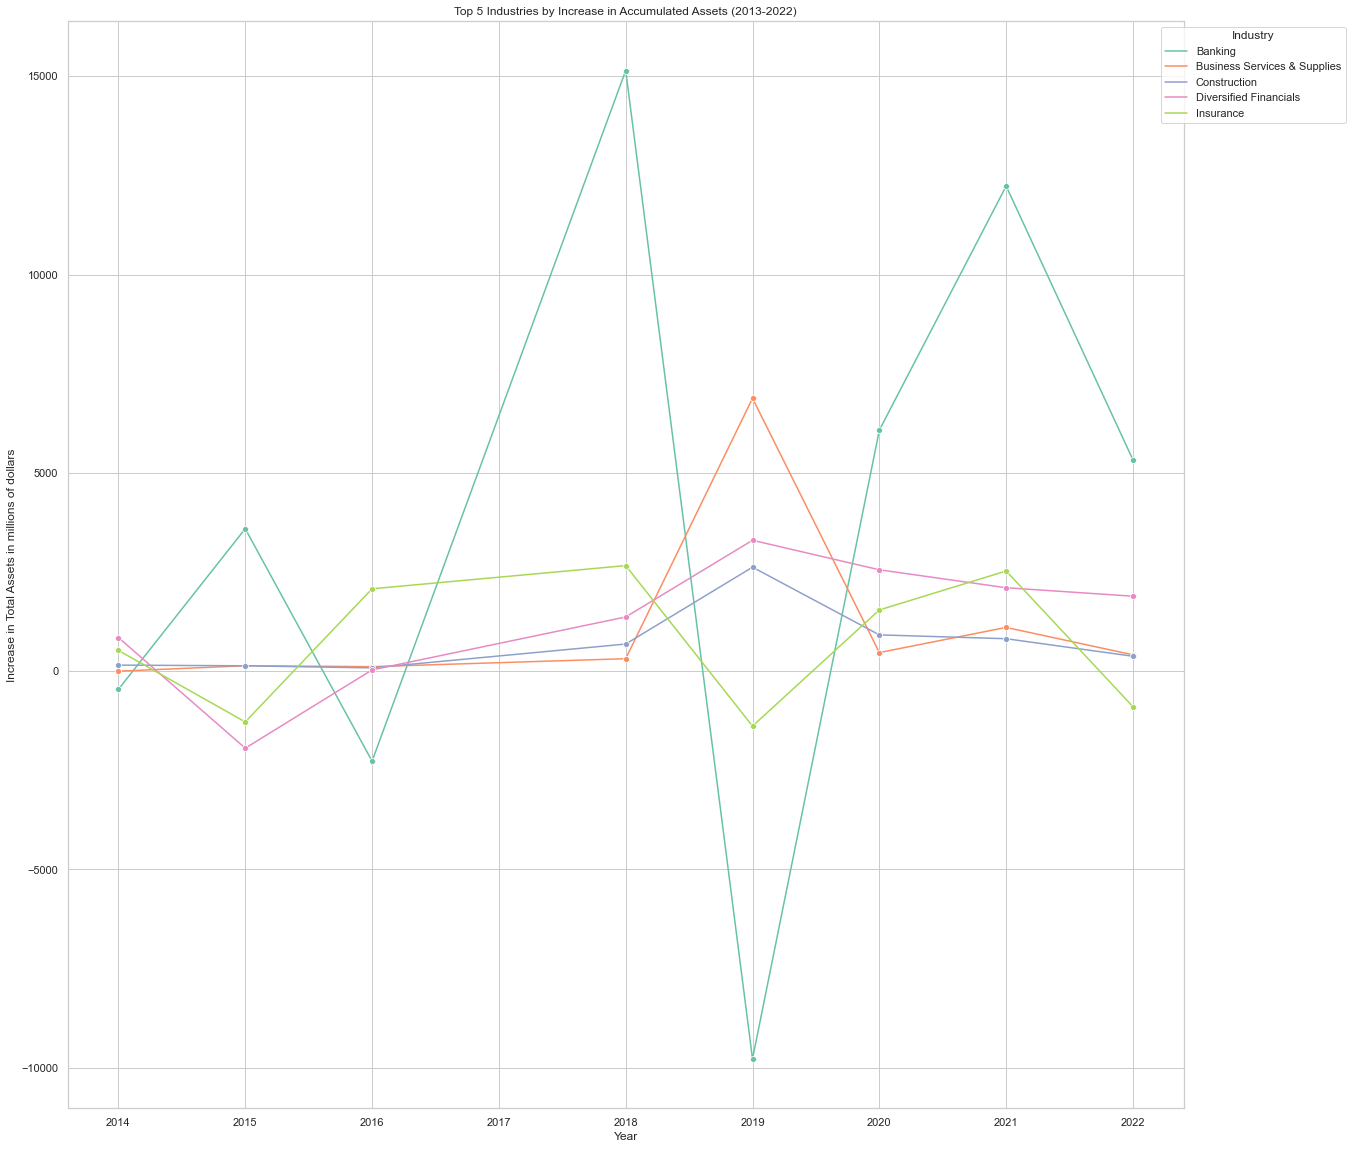

In [38]:

# Filter data for the relevant years
relevant_years = [2013,2014, 2015, 2016, 1017, 2018, 2019, 2020, 2021, 2022]
data_relevant_years = data[data['Year'].isin(relevant_years)]

# Group by 'Industry' and calculate the increase in assets for each industry over the years
industry_assets = data_relevant_years.groupby(['Industry', 'Year'])['Assets'].sum().reset_index()
industry_assets['Increase'] = industry_assets.groupby('Industry')['Assets'].diff()

# Get the top 10 industries based on total assets increase across all years
top_10_industries_increase = industry_assets.groupby('Industry')['Increase'].sum().nlargest(5).index

# Filter the data for the top 10 industries
top_10_data_increase = industry_assets[industry_assets['Industry'].isin(top_10_industries_increase)]

# Set up a line plot
plt.figure(figsize=(20, 20))
sns.lineplot(x='Year', y='Increase', hue='Industry', data=top_10_data_increase, palette='Set2', marker='o')

# Customize the plot
plt.title('Top 5 Industries by Increase in Accumulated Assets (2013-2022)')
plt.xlabel('Year')
plt.ylabel('Increase in Total Assets in millions of dollars')
plt.legend(title='Industry', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()

- Hypothesis 4.2 : Comparing the years from 2013 to 2022, the banking sector exhibits the highest growth in accumulated assets among Fortune 2000 companies, followed by business services and supplies. Interestingly, the software, IT, and services industry does not secure a position within the top five sectors in terms of asset accumulation during this period for Fortune 2000 companies.

## Hypothesis 6: The increase in profits of companies is positively correlated with the GDP growth of their respective countries.

## Regression Analysis: Profits vs. GDP (2020-2022)

A regression analysis was conducted for the years 2020, 2021, and 2022 to explore the relationship between profits and the Gross Domestic Product (GDP) of different countries. The regplot graphically represents this relationship, allowing for a visual inspection of trends and potential correlations between profits and GDP. The analysis aims to uncover insights into how economic factors may influence the profitability of companies during this time period.


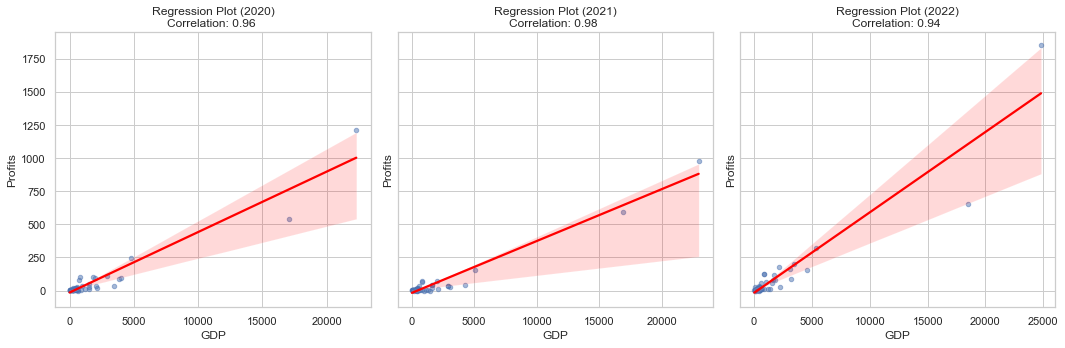

In [39]:

selected_years = [year for year in range(2020, 2023)]

# Create subplots
fig, axes = plt.subplots(1, len(selected_years), figsize=(15, 5), sharey=True)

# Iterate through each year
for i, year in enumerate(selected_years):
    # Filter data for the current year
    year_data = profits_per_year[profits_per_year['Year'] == year]

    # Check if there are more than one data point for the current year
    if len(year_data) > 1:
        # Plot regplot
        sns.regplot(x='gdp', y='Profits', data=year_data, scatter_kws={'alpha': 0.5, 's': 20}, line_kws={'color': 'red'}, ax=axes[i])

        # Calculate correlation coefficient
        correlation_coefficient, p_value = pearsonr(year_data['gdp'], year_data['Profits'])

        # Set labels and title with correlation coefficient
        axes[i].set_xlabel('GDP')
        axes[i].set_ylabel('Profits')
        axes[i].set_title(f'Regression Plot ({year})\nCorrelation: {correlation_coefficient:.2f} ')

# Adjust layout
plt.tight_layout()
plt.show()

- The Pearson correlation coefficients between GDP and profits for the years 2020, 2021, and 2022 are exceptionally high, indicating a strong positive linear relationship. In 2020, the correlation coefficient is 0.96, strengthening to 0.98 in 2021, and remaining robust at 0.94 in 2022. This suggests a consistent and strong positive correlation between the economic performance, as measured by GDP, and the profitability of the companies in the dataset over these years.

## Hypothesis 7: The Forbes 2000 list should exhibit a distinct and significant increase in the representation and ranking of technology companies, stemming from technological advancements and innovations, particularly from the year 2010 onwards.

## Ranking Trends: IT Software & Services Sector (2008-2022)

    Year  Count
0   2008     32
1   2009     35
2   2010     35
3   2011     34
4   2012     36
5   2013     36
6   2014     42
7   2015     40
8   2016     50
9   2017     48
10  2018     52
11  2019     63
12  2020     70
13  2021     83
14  2022     73


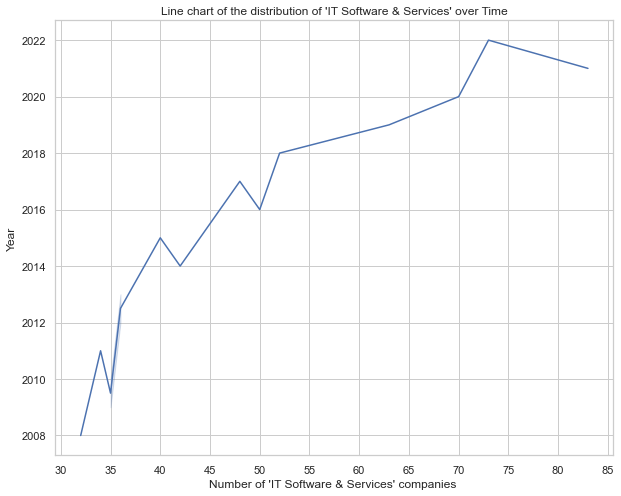

In [40]:
industry_data = data[data['Industry'] == 'IT Software & Services'].groupby('Year').size().reset_index(name='Count')

print(industry_data)
plt.figure(figsize=(10,8))
sns.lineplot(data = industry_data, x = "Count", y = "Year")
plt.xticks(range(30, 90, 5))
plt.xlabel("Number of 'IT Software & Services' companies ")
plt.title("Line chart of the distribution of 'IT Software & Services' over Time")
plt.show()

- The count of companies in the IT Software & Services sector witnessed a remarkable surge, soaring by more than 147 percent from 2008 to 2022 in the Fortune 2000 list. This substantial increase underscores a significant growth trend in this industry.
